<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/Ecuaci%C3%B3n_de_Onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación de Onda. Método Explícito

Primeramente se definira el problema a resolver:

El problema es:
$$
u_{tt}-4u_{xx} = 0, \quad 0<x<1, \quad t>0
$$
$$
u(0,t) = u(1,t) = 0, \quad u(x,0) = sin(πx), \quad u_t(x,0) = 0
$$
Con $h=0.1$, $k=0.05$ cuya solución exacta es:
$$
u(x,t) = sin(πx)cos(2πt)
$$
Dado que:
$$
u_{tt}=4u_{xx} ⇒ α^2= 4 ⇒ \alpha = 2
$$

Donde el esquema explícito (central en tiempo y espacio) es:
$$
u_i^{n+1} = 2(1-λ^2)u_i^n + λ^2(u_{i+1}^n+u_{i-1}^n)-u_i^{n-1}, \quad λ=\frac{αk}{h}, \quad α = 2
$$

El primer paso en tiempo (para construir $u_i^1$) usando Taylor es:
$$
u_i^1 = u_i^0 + \frac{λ^2}{2}(u_{i+1}^0-2u_i^0+u_{i-1}^0)
$$
Ddao que $u_t(x,0) = 0$

# Solución

**Definición de librerías , parámetros y funciones básicas**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D   # para la gráfica 3D
from matplotlib import animation
import math

# Parámetros espaciales y temporales
h = 0.1          # paso en x
k = 0.05         # paso en t
c = 2.0          # velocidad de la onda (alpha^2 = 4)
lam = c * k / h  # λ = alpha k / h
lam2 = lam**2

print(f"h = {h},   k = {k},   c = {c},   λ = {lam}")

# Dominio espacial: x = 0, 0.1, ..., 1.0 (11 puntos)
Nx = int(1/h)        # número de subintervalos = 10
x = np.linspace(0, 1, Nx+1)

# Tiempo máximo: usaremos T = 1.0  (20 pasos de k = 0.05)
T = 1.0
Nt = int(T/k)        # número de pasos de tiempo = 20
t = np.linspace(0, T, Nt+1)

# Condición inicial u(x,0) = sin(π x)
def u0(x):
    return np.sin(np.pi * x)

# Derivada inicial u_t(x,0) = 0
def ut0(x):
    return 0.0 * x

# Solución exacta: u(x,t) = sin(πx) cos(2πt)
def u_exact(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)


h = 0.1,   k = 0.05,   c = 2.0,   λ = 1.0


**Construcción de la malla y condiciones iniciales**

In [2]:
# ============================================================
# Malla y matrices para la solución numérica
# ============================================================
# U tendrá tamaño (Nt+1) × (Nx+1):
#   filas   → tiempos t_n
#   columnas → posiciones x_i
# ============================================================

U = np.zeros((Nt+1, Nx+1))

# t = 0: aplicamos la condición inicial u(x,0) = sin(π x)
U[0, :] = u0(x)

# Condiciones de frontera para todos los tiempos:
# u(0,t) = 0, u(1,t) = 0  (ya están en cero por inicialización,
# pero lo dejamos explícito para mayor claridad)
U[:, 0]  = 0.0
U[:, -1] = 0.0

# Primer paso en tiempo (n = 0 → n = 1) usando Taylor:
# U[1,i] = U[0,i] + (λ^2 / 2) * (U[0,i+1] - 2 U[0,i] + U[0,i-1])
for i in range(1, Nx):
    U[1, i] = (U[0, i]
               + 0.5 * lam2 * (U[0, i+1] - 2*U[0, i] + U[0, i-1]))

# Volvemos a imponer fronteras en t = k
U[1, 0]  = 0.0
U[1, -1] = 0.0

# Echamos un vistazo rápido a las dos primeras filas
print("U[0,:] (t=0):   ", np.round(U[0, :], 4))
print("U[1,:] (t=0.05):", np.round(U[1, :], 4))


U[0,:] (t=0):    [0.     0.309  0.5878 0.809  0.9511 1.     0.9511 0.809  0.5878 0.309
 0.    ]
U[1,:] (t=0.05): [0.     0.2939 0.559  0.7694 0.9045 0.9511 0.9045 0.7694 0.559  0.2939
 0.    ]


**Esquema explícito para todos los tiempos**

In [3]:
# ============================================================
# Esquema explícito para n >= 1:
# ============================================================
# u_i^{n+1} = 2(1-λ^2) u_i^n + λ^2 (u_{i+1}^n + u_{i-1}^n) - u_i^{n-1}
# ============================================================

for n in range(1, Nt):      # n = 1,2,...,Nt-1
    for i in range(1, Nx):  # i = 1,...,Nx-1 (puntos interiores)
        U[n+1, i] = (2*(1 - lam2)*U[n, i]
                      + lam2*(U[n, i+1] + U[n, i-1])
                      - U[n-1, i])
    # Fronteras en cada paso
    U[n+1, 0]  = 0.0
    U[n+1, -1] = 0.0

print("Cálculo terminado. Forma de U:", U.shape)


Cálculo terminado. Forma de U: (21, 11)


**Ejercicio 1: gráficas 2D y 3D hasta t = 0.50**

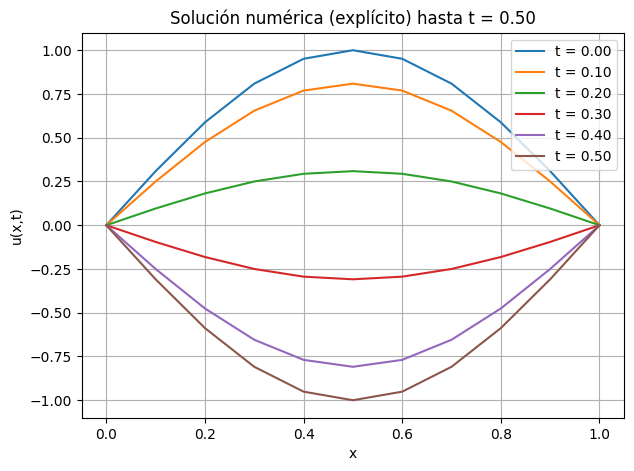

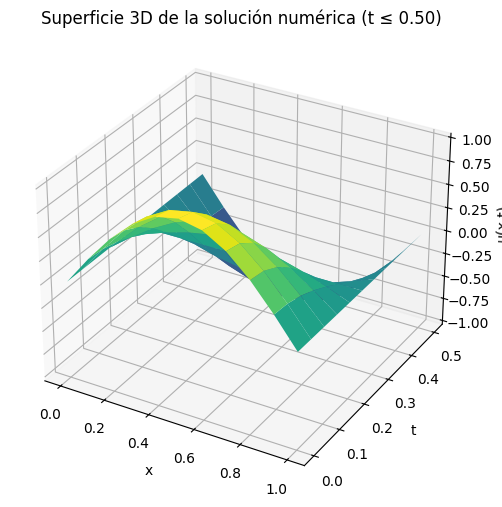

In [4]:
# ============================================================
# Ejercicio 1
# Gráficas 2D y 3D de la solución hasta t = 0.50
# ============================================================

# 1) Gráficas 2D para algunos tiempos intermedios hasta t=0.5
fig, ax = plt.subplots(figsize=(7, 5))

# tomamos tiempos: t = 0, 0.1, 0.2, 0.3, 0.4, 0.5  (cada 2 pasos de k=0.05)
indices_t = [0, 2, 4, 6, 8, 10]
for n in indices_t:
    ax.plot(x, U[n, :], label=f"t = {n*k:.2f}")

ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Solución numérica (explícito) hasta t = 0.50")
ax.grid(True)
ax.legend()
plt.show()

# 2) Superficie 3D hasta t = 0.50
# Tomamos todas las filas con t <= 0.5 (n = 0,...,10)
Nt_half = int(0.50 / k)   # 10
T_half = t[:Nt_half+1]
U_half = U[:Nt_half+1, :]

Tgrid, Xgrid = np.meshgrid(T_half, x)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Xgrid, Tgrid, U_half.T, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")
ax.set_title("Superficie 3D de la solución numérica (t ≤ 0.50)")
plt.show()

**Ejercicio 2: comparación con Tabla 12.6 (valores numéricos)**

La tabla 12.6 da $w_{i,20}$ para $x_i=0,0.1, ... ,1 $.
Con $k=0.05$, el paso 20 corresponde a $t=20, k=1.0$

In [5]:
# ============================================================
# Comparación con los valores de la Tabla 12.6
#   (tiempo t = 1.0, paso n = 20)
# ============================================================

n_Tabla = 20          # n = 20 ⇒ t = 1.0
t_Tabla = n_Tabla * k

# Nuestra solución numérica en t = 1.0
u_num_Tabla = U[n_Tabla, :]

# Valores de referencia tipo Tabla 12.6:
# w_i,20 = sin(pi x_i)
w_ref = np.sin(np.pi * x)

# Error punto a punto
error_tabla = np.abs(u_num_Tabla - w_ref)

# Construimos una tabla para imprimir
filas = []
for i in range(Nx+1):
    filas.append([x[i], w_ref[i], u_num_Tabla[i], error_tabla[i]])

encabezados = ["x_i", "Tabla 12.6 (ref)", "Numérico explícito", "Error abs."]

print(f"Comparación en t = {t_Tabla:.2f} (n = {n_Tabla})\n")
print(tabulate(filas, headers=encabezados,
               tablefmt="grid", floatfmt=".10f"))

print("\nError máximo respecto a la Tabla 12.6:",
      np.max(error_tabla))
print("Error medio respecto a la Tabla 12.6:",
      np.mean(error_tabla))


Comparación en t = 1.00 (n = 20)

+--------------+--------------------+----------------------+--------------+
|          x_i |   Tabla 12.6 (ref) |   Numérico explícito |   Error abs. |
+==============+====================+======================+==============+
| 0.0000000000 |       0.0000000000 |         0.0000000000 | 0.0000000000 |
+--------------+--------------------+----------------------+--------------+
| 0.1000000000 |       0.3090169944 |         0.3090169944 | 0.0000000000 |
+--------------+--------------------+----------------------+--------------+
| 0.2000000000 |       0.5877852523 |         0.5877852523 | 0.0000000000 |
+--------------+--------------------+----------------------+--------------+
| 0.3000000000 |       0.8090169944 |         0.8090169944 | 0.0000000000 |
+--------------+--------------------+----------------------+--------------+
| 0.4000000000 |       0.9510565163 |         0.9510565163 | 0.0000000000 |
+--------------+--------------------+-----------------

**Ejercicio 3: Comparación con la solución exacta**

Usamos:
$$
u(x,t)= sin(πx)cos(2πt)
$$
Podemos comparar en $t=1.0$ (coincide con la tabla) y también calcular el error global en toda la rejilla.

Comparación con la solución exacta en t = 1.00

+--------------+-----------------+--------------+--------------+
|          x_i |   Exacta u(x,1) |     Numérico |   Error abs. |
+==============+=================+==============+==============+
| 0.0000000000 |    0.0000000000 | 0.0000000000 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.1000000000 |    0.3090169944 | 0.3090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.2000000000 |    0.5877852523 | 0.5877852523 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.3000000000 |    0.8090169944 | 0.8090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.4000000000 |    0.9510565163 | 0.9510565163 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.5000000000 |    1.0000000000 | 1.0000000000 | 0.0000000000 |
+--------------+-----------------+--------

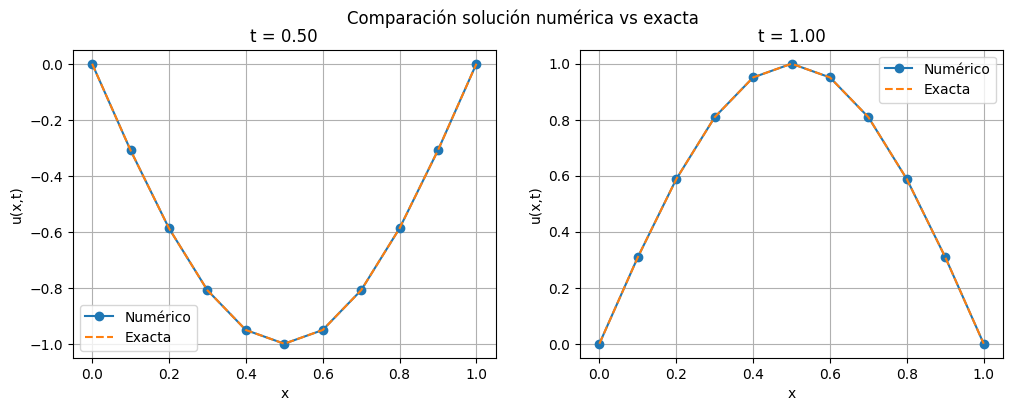

In [6]:
# ============================================================
# Comparación con la solución exacta
# ============================================================

# 1) Comparación puntual en t = 1.0 (mismo que la Tabla 12.6)
u_exact_Tabla = u_exact(x, t_Tabla)
error_exact_Tabla = np.abs(u_num_Tabla - u_exact_Tabla)

filas2 = []
for i in range(Nx+1):
    filas2.append([x[i], u_exact_Tabla[i], u_num_Tabla[i], error_exact_Tabla[i]])

encabezados2 = ["x_i", "Exacta u(x,1)", "Numérico", "Error abs."]

print(f"Comparación con la solución exacta en t = {t_Tabla:.2f}\n")
print(tabulate(filas2, headers=encabezados2,
               tablefmt="grid", floatfmt=".10f"))

print("\nError máximo (exacta, t=1):", np.max(error_exact_Tabla))
print("Error medio  (exacta, t=1):", np.mean(error_exact_Tabla))

# 2) Error global en toda la rejilla (todos los tiempos)
U_exact_full = np.zeros_like(U)
for n_idx in range(Nt+1):
    for i in range(Nx+1):
        U_exact_full[n_idx, i] = u_exact(x[i], t[n_idx])

error_full = np.abs(U - U_exact_full)

print("\nError máximo en toda la rejilla:", np.max(error_full))
print("Error medio en toda la rejilla :", np.mean(error_full))

# 3) Gráfica numérica vs exacta en t=0.50 y t=1.00
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# t = 0.50
n_05 = int(0.50 / k)
ax[0].plot(x, U[n_05, :], 'o-', label="Numérico")
ax[0].plot(x, u_exact(x, 0.50), '--', label="Exacta")
ax[0].set_title("t = 0.50")
ax[0].set_xlabel("x"); ax[0].set_ylabel("u(x,t)")
ax[0].grid(True); ax[0].legend()

# t = 1.00
ax[1].plot(x, U[n_Tabla, :], 'o-', label="Numérico")
ax[1].plot(x, u_exact(x, t_Tabla), '--', label="Exacta")
ax[1].set_title("t = 1.00")
ax[1].set_xlabel("x"); ax[1].set_ylabel("u(x,t)")
ax[1].grid(True); ax[1].legend()

plt.suptitle("Comparación solución numérica vs exacta")
plt.show()

**Ejercicio 4: Animación de la onda**

Esta animación muestra la onda oscilando en el intervalo $0≤x≤1$

In [7]:
# ============================================================
# Animación de la evolución temporal de la solución
# ============================================================

fig, ax = plt.subplots(figsize=(7, 4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución temporal de la solución (método explícito)")
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def animate(n):
    y = U[n, :]
    line.set_data(x, y)
    ax.set_title(f"t = {n*k:.2f}")
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=Nt+1, interval=100, blit=True)

plt.close(fig)  # para que no salga la figura estática duplicada

# En Colab: mostrar la animación como HTML
from IPython.display import HTML
HTML(ani.to_jshtml())


Para que puedamos ver la animación en github, vamos agregar:

GIF generado: onda.gif


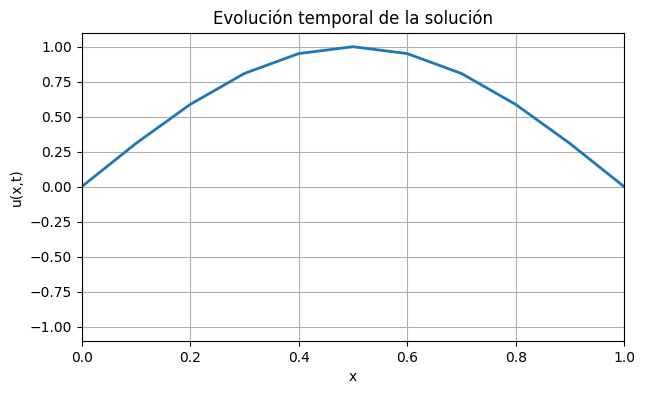

In [8]:
# ============================================================
# Guardar la animación como GIF para que GitHub sí la muestre
# ============================================================

import matplotlib.animation as animation
from matplotlib import pyplot as plt
from IPython.display import Image

fig, ax = plt.subplots(figsize=(7, 4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución temporal de la solución")
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def animate(n):
    y = U[n, :]
    line.set_data(x, y)
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=Nt+1, interval=100, blit=True)

ani.save("onda.gif", writer="pillow", fps=10)

print("GIF generado: onda.gif")
